<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/utitls2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

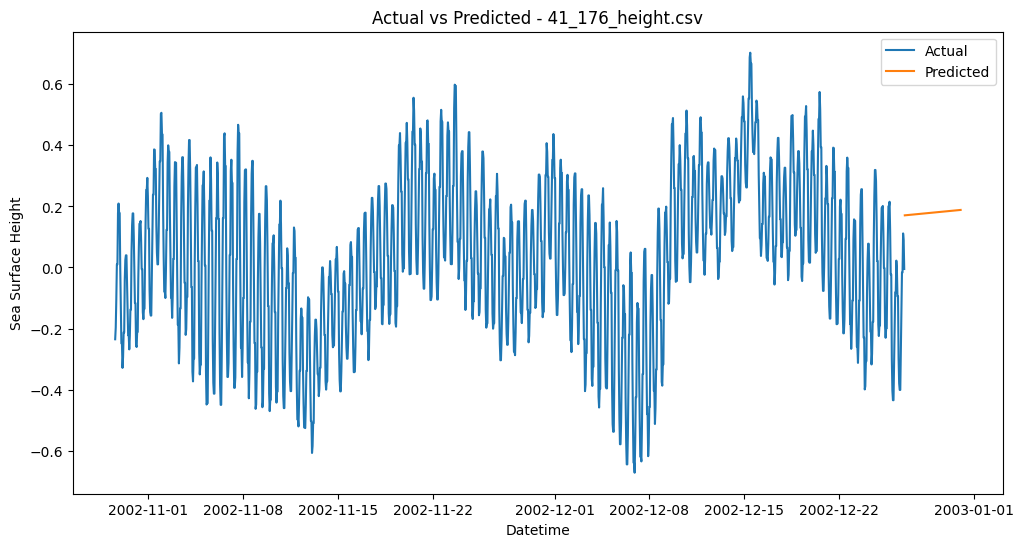

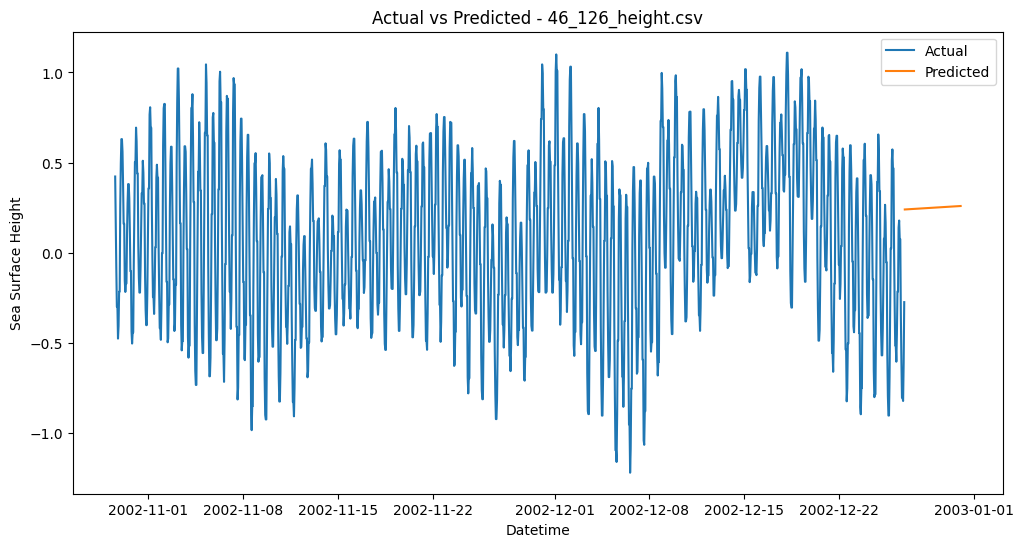

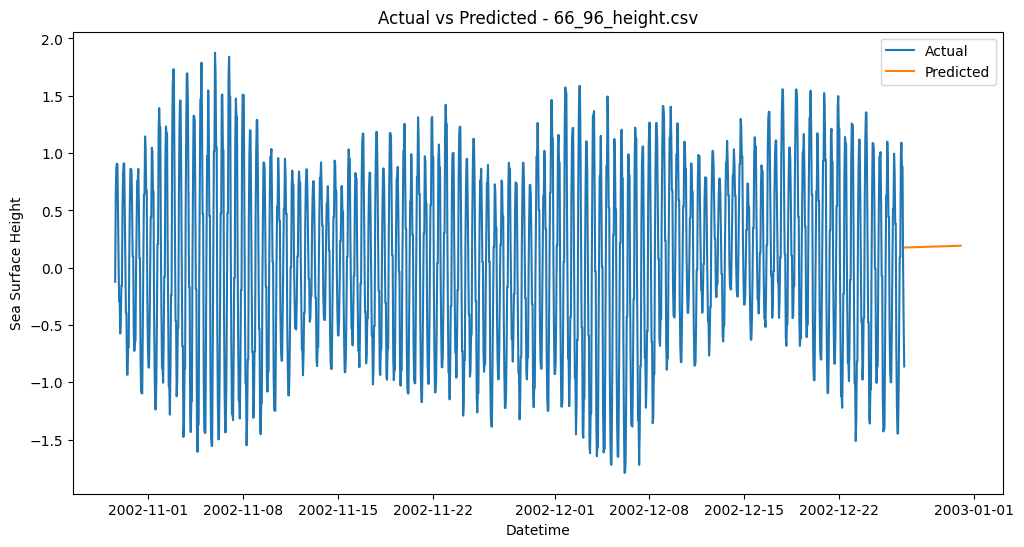

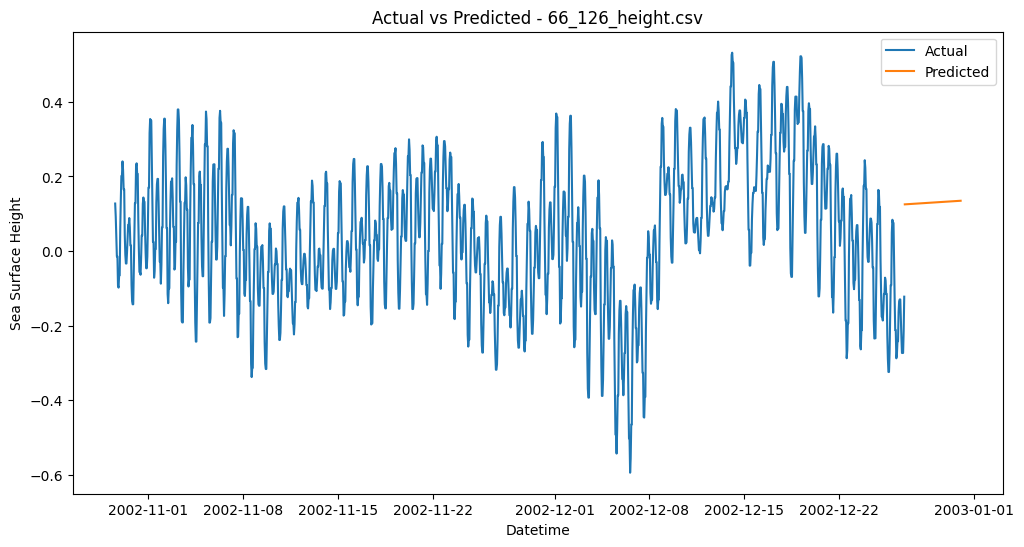

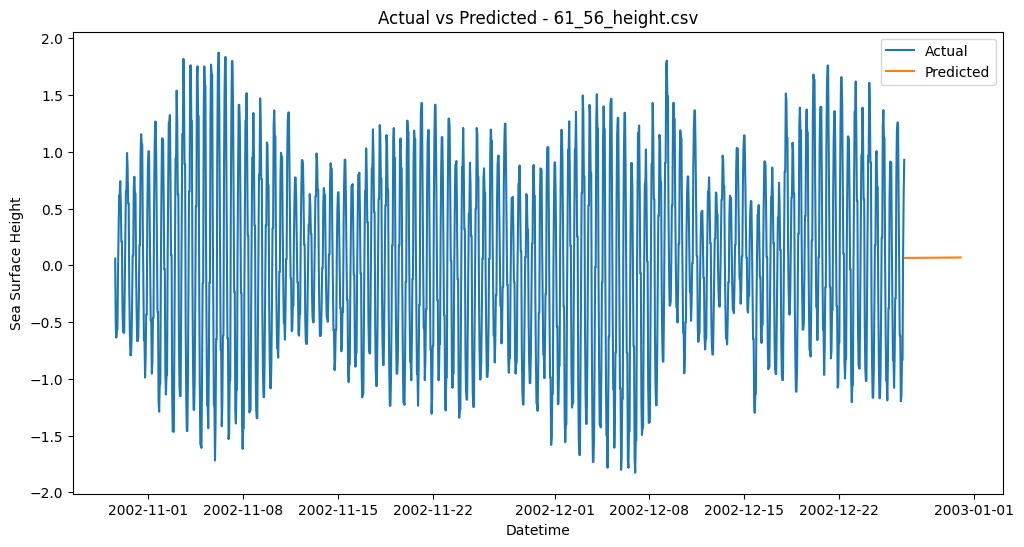

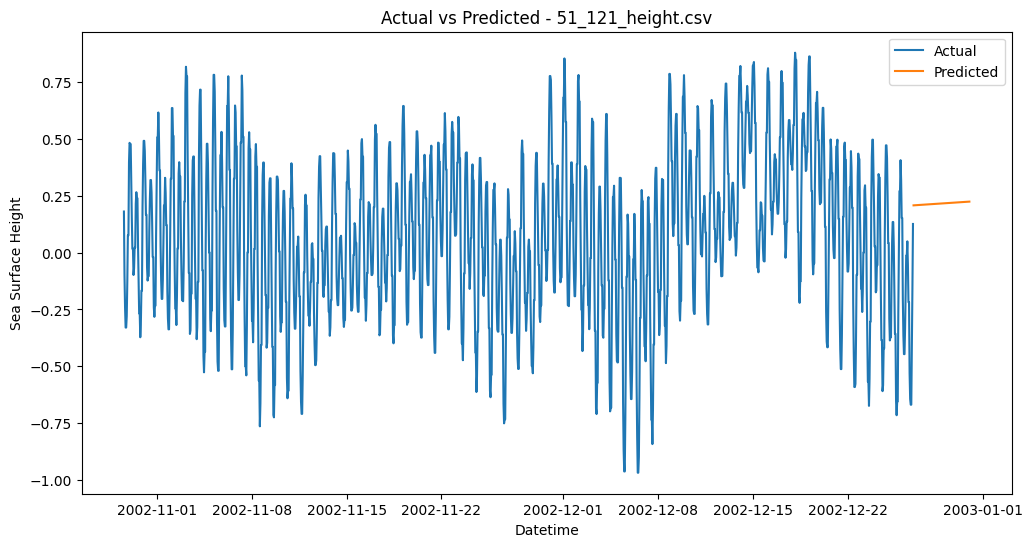

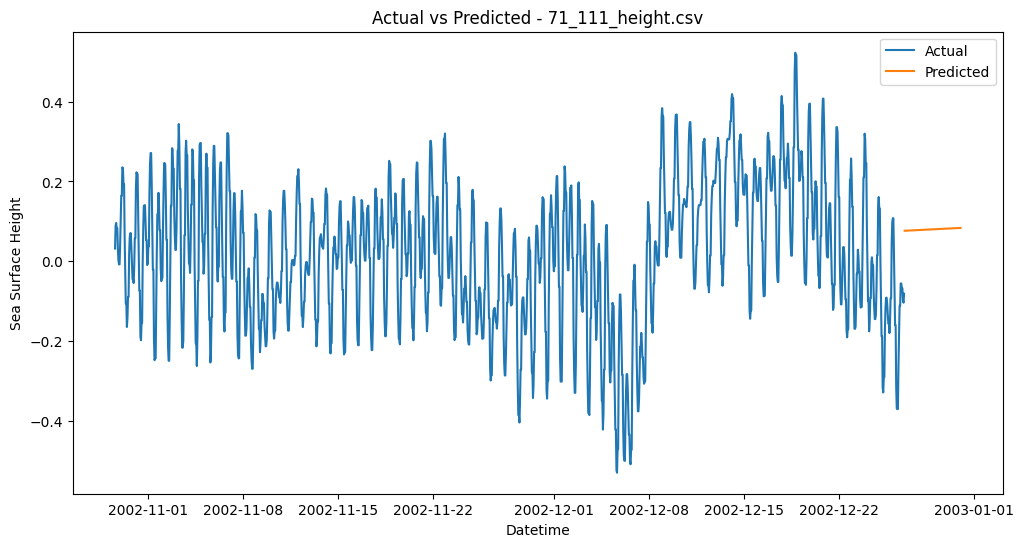

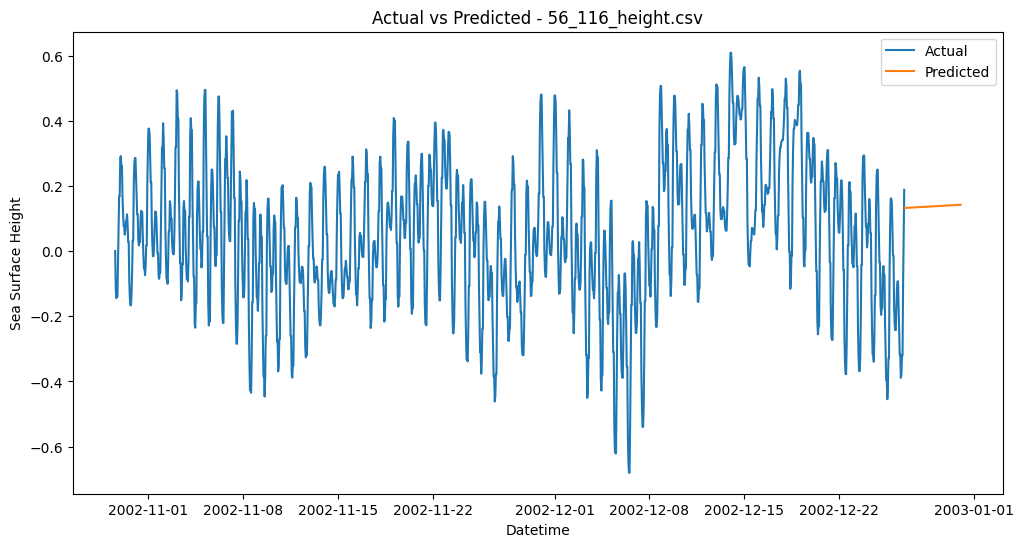

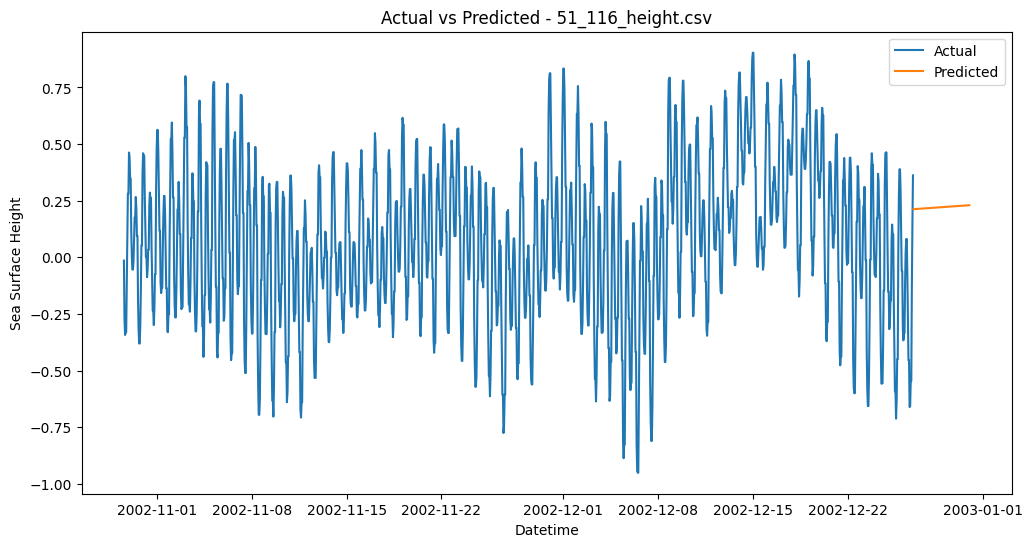

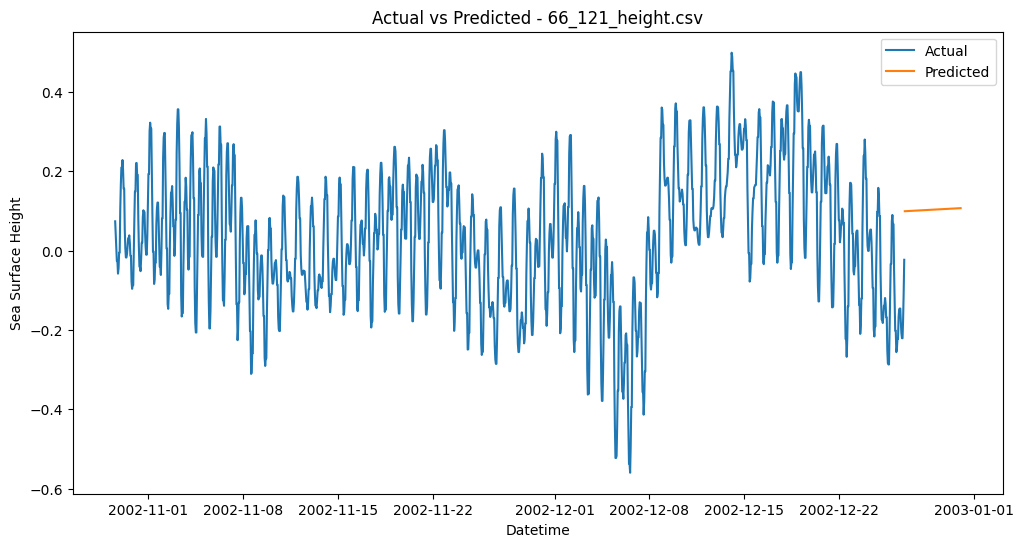

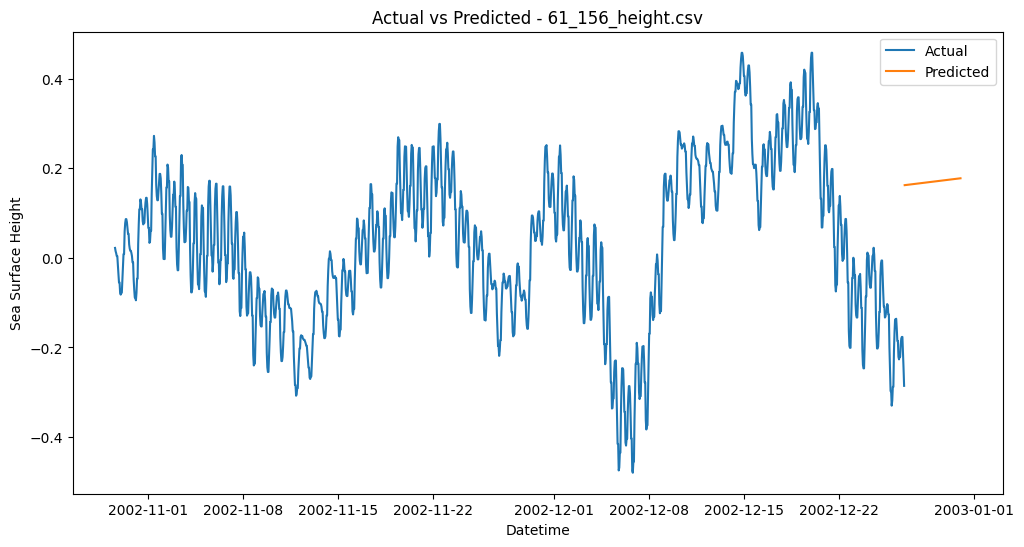

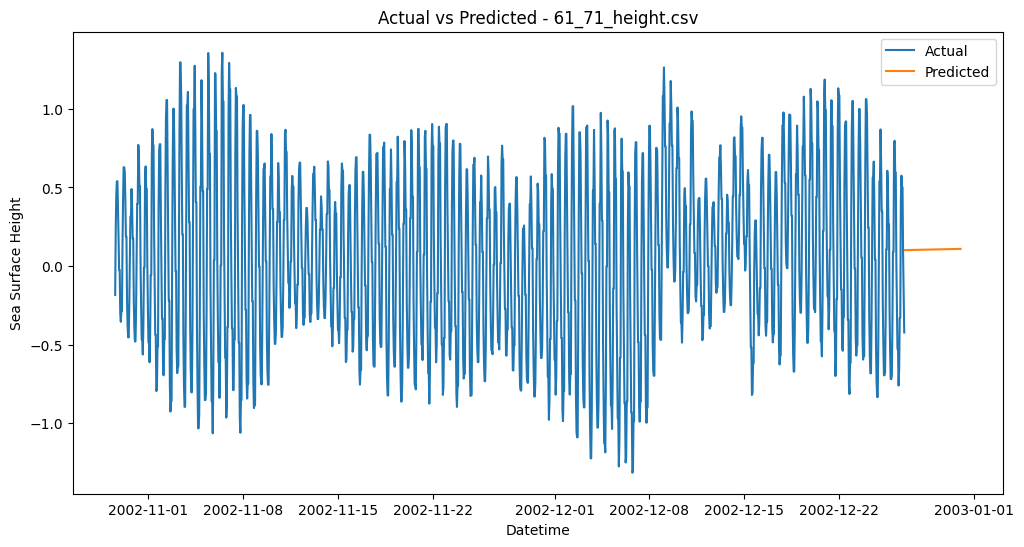

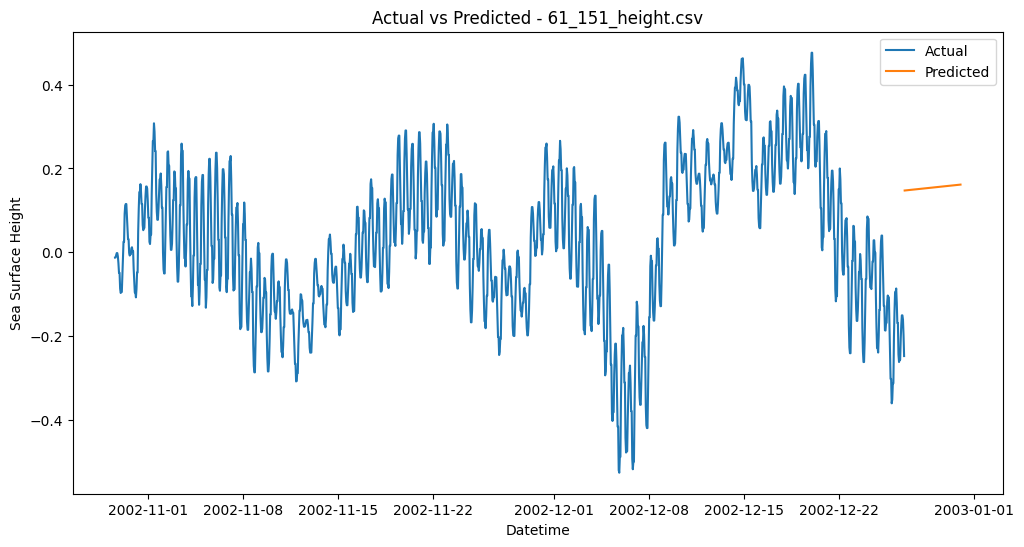

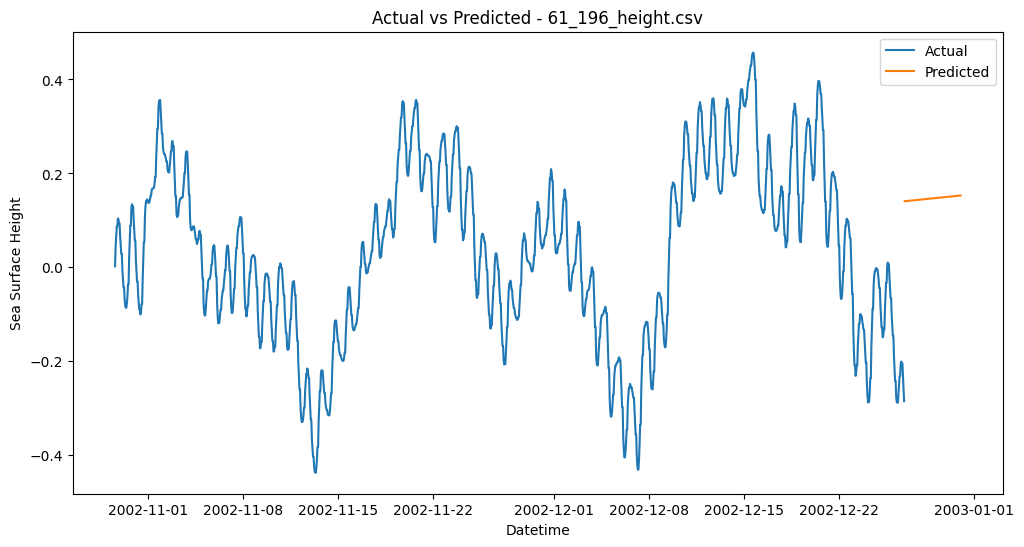

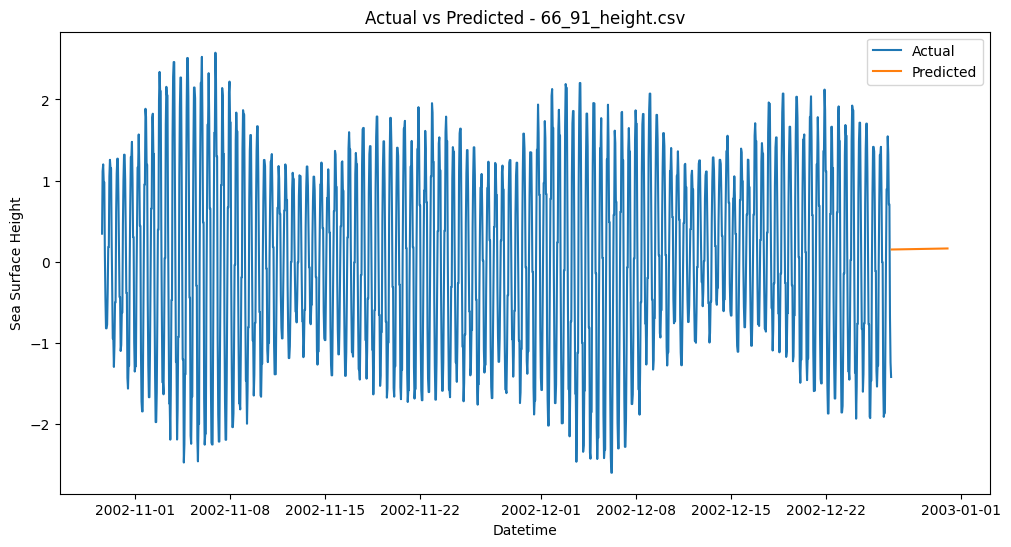

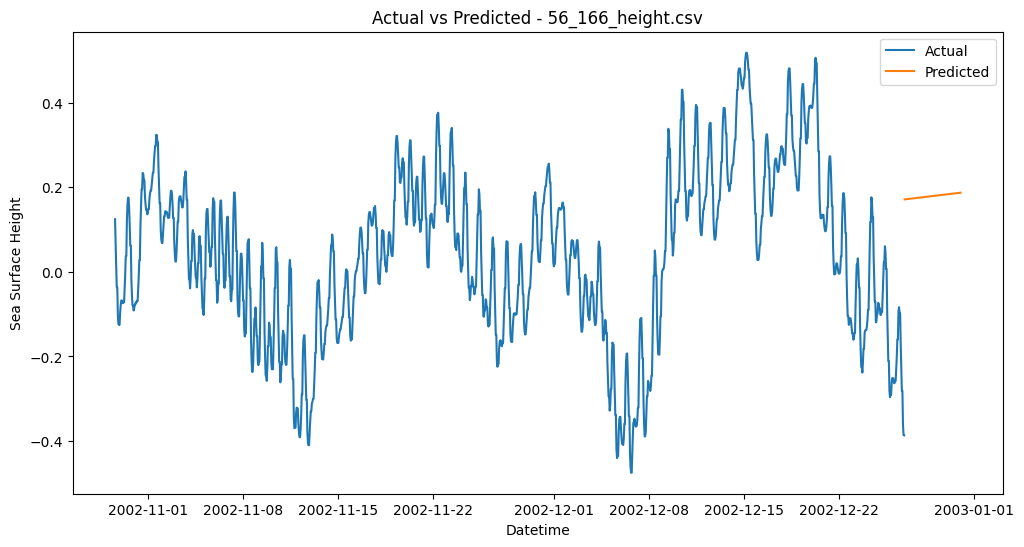

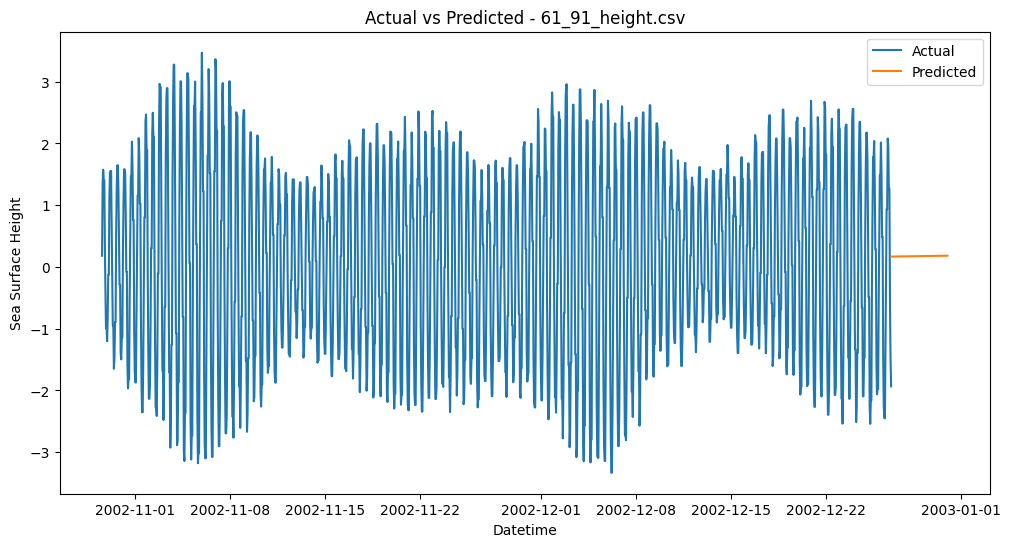

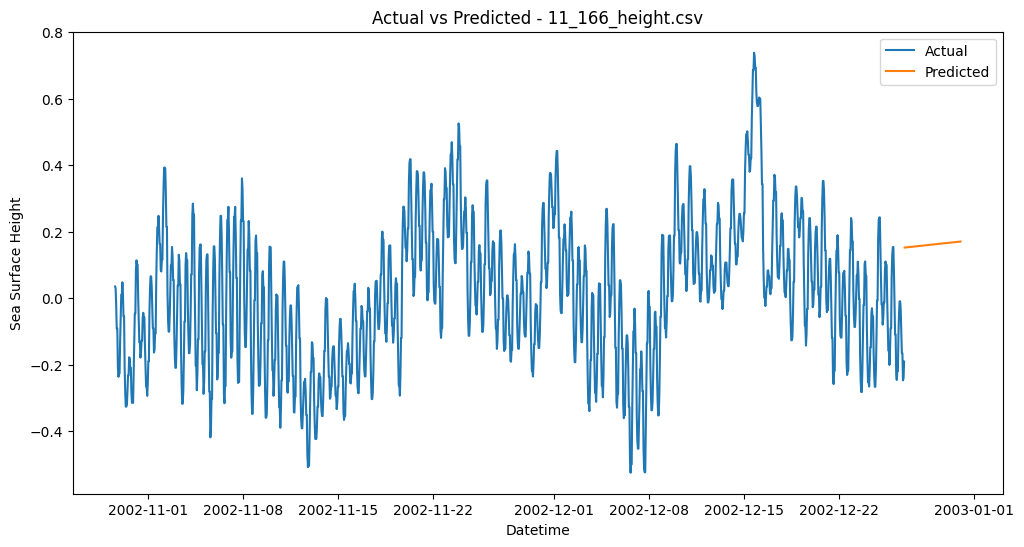

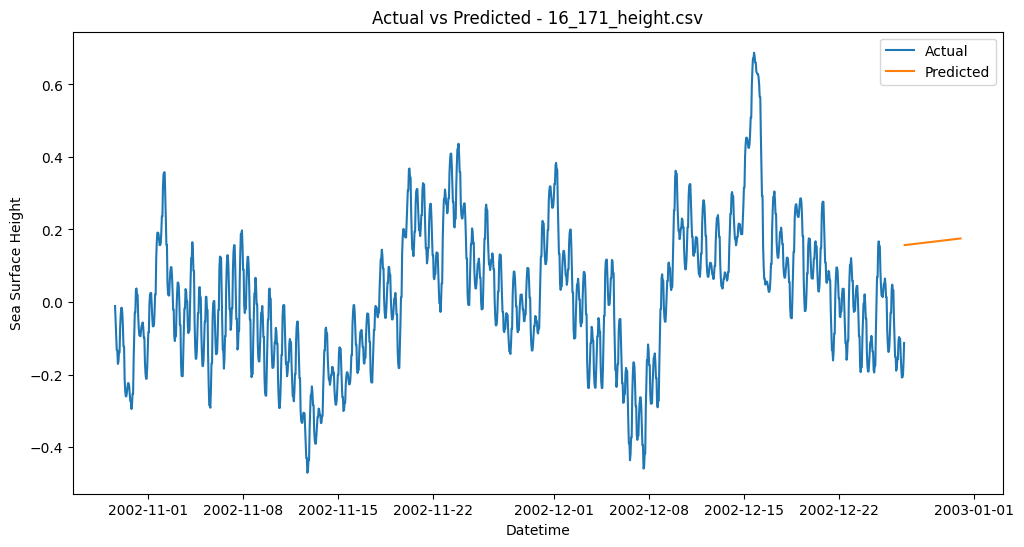

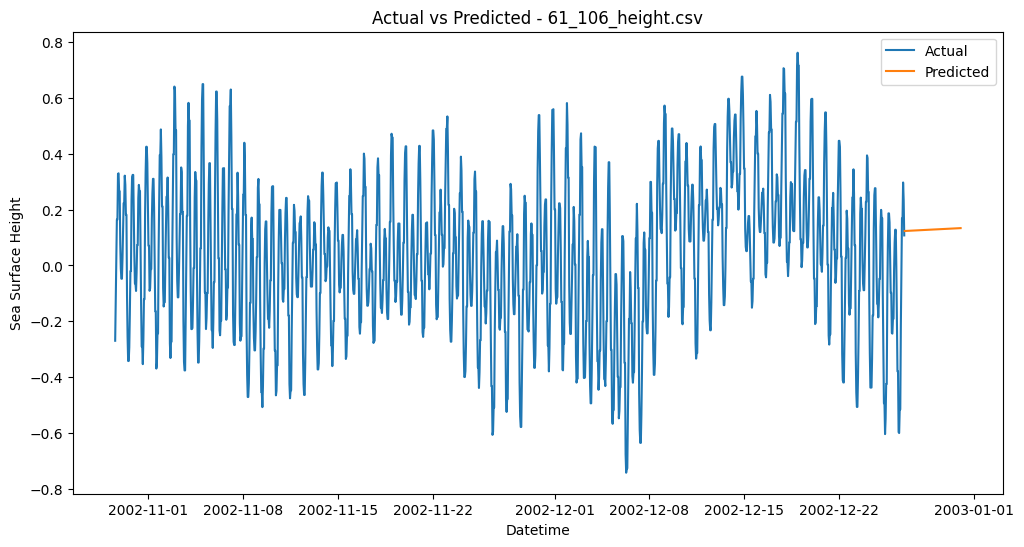

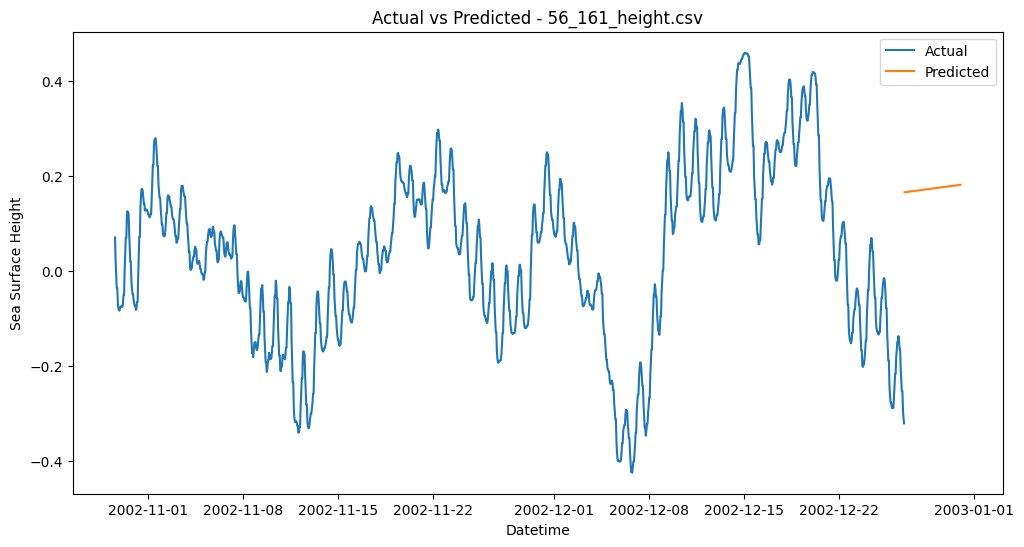

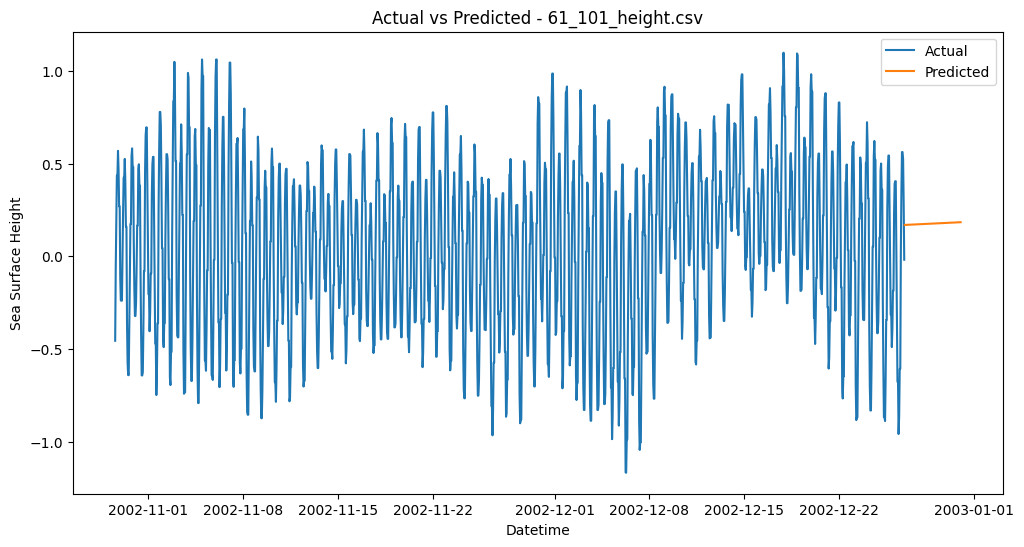

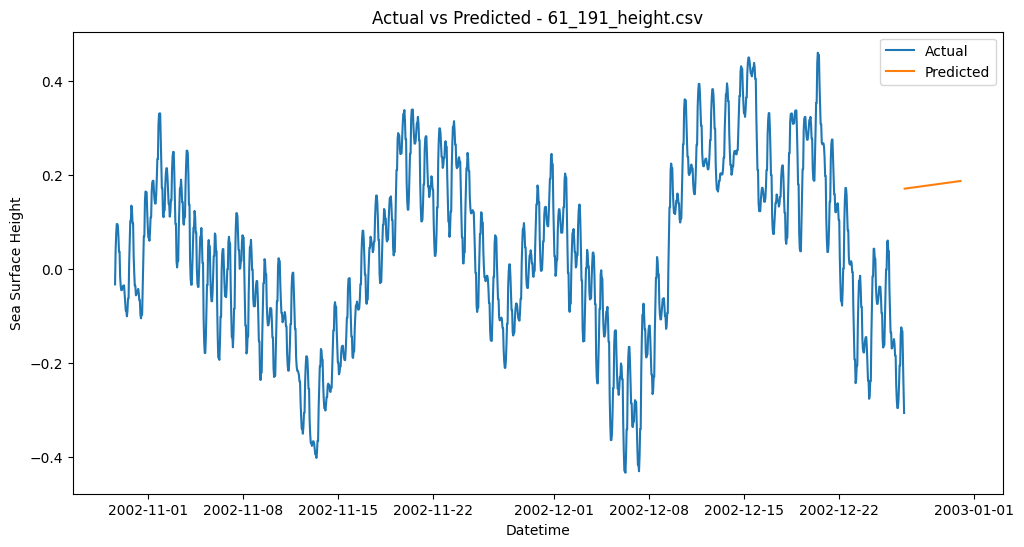

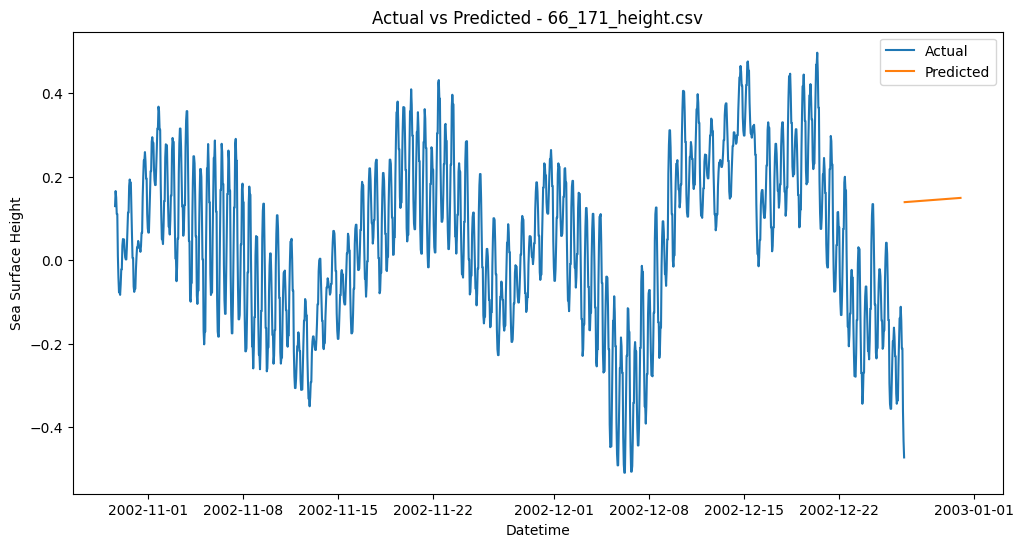

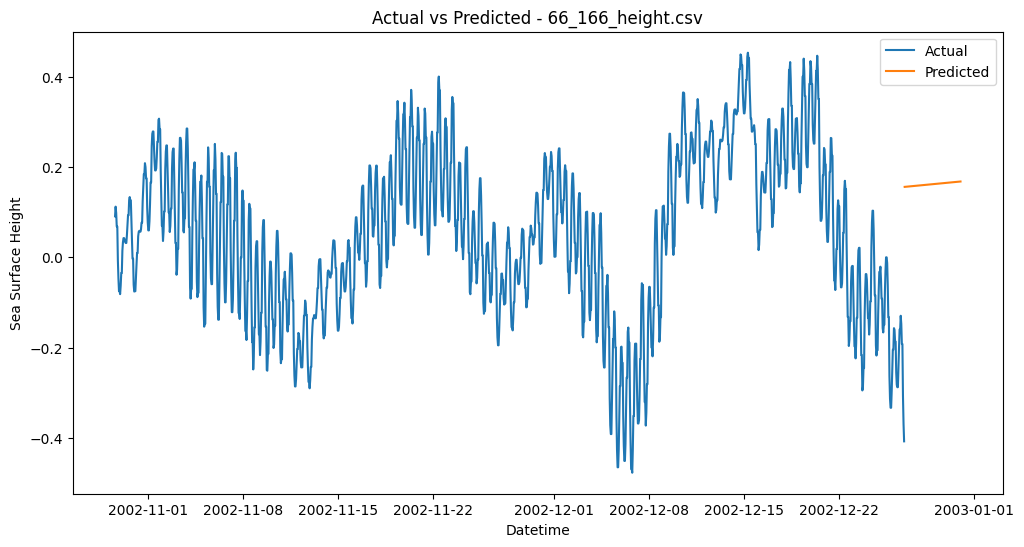

Evaluation Results:
                 File       SMAPE       MSE
0   41_176_height.csv  147.557974  0.100352
1   46_126_height.csv  139.111129  0.331441
2    66_96_height.csv  160.950539  0.793330
3   66_126_height.csv  149.333537  0.059345
4    61_56_height.csv  179.214107  0.775810
5   51_121_height.csv  141.685114  0.204675
6   71_111_height.csv  165.003133  0.040395
7   56_116_height.csv  142.284786  0.080777
8   51_116_height.csv  138.373432  0.197449
9   66_121_height.csv  147.863498  0.043615
10  61_156_height.csv  198.650443  0.096122
11   61_71_height.csv  153.512549  0.330548
12  61_151_height.csv  187.598295  0.087637
13  61_196_height.csv  191.845728  0.086279
14   66_91_height.csv  173.318001  1.580740
15  56_166_height.csv  183.428323  0.102740
16   61_91_height.csv  171.405131  2.771068
17  11_166_height.csv  152.949474  0.063748
18  16_171_height.csv  165.608288  0.058381
19  61_106_height.csv  137.403209  0.108510
20  56_161_height.csv  193.676976  0.098625
21  61_101_h

In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from utils import create_folder, smape
import matplotlib.pyplot as plt


def load_data(file_path):
    return pd.read_csv(file_path, parse_dates=['datetime'], index_col='datetime')


def train_model(data):
    X = data[:-100].index.astype(int).values.reshape(-1, 1)
    y = data['ssh'][:-100].values
    model = LinearRegression()
    model.fit(X, y)
    return model


def generate_predictions(model, start_time, num_predictions):
    prediction_times = pd.date_range(start=start_time, periods=num_predictions, freq='H')
    X_pred = prediction_times.astype(int).values.reshape(-1, 1)
    predictions = model.predict(X_pred)
    return pd.DataFrame({'ssh': predictions}, index=prediction_times)


def save_predictions(predictions, file_name, save_folder):
    predictions.reset_index().rename(columns={'index': 'datetime'}).to_csv(os.path.join(save_folder, file_name),
                                                                           index=False)


def evaluate_model(data, predictions):
    y_true = data['ssh'][-100:].values
    y_pred = predictions['ssh'].values
    smape_score = smape(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return smape_score, mse


def plot_results(data, predictions, file_name):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['ssh'], label='Actual')
    plt.plot(predictions.index, predictions['ssh'], label='Predicted')
    plt.xlabel('Datetime')
    plt.ylabel('Sea Surface Height')
    plt.title(f'Actual vs Predicted - {file_name}')
    plt.legend()
    plt.show()


def main():
    train_folder = "train"
    predictions_folder = "predictions"
    create_folder(predictions_folder)

    results = []

    for file_name in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file_name)
        data = load_data(file_path)

        model = train_model(data)

        start_time = '2002-12-26 21:00:00'
        num_predictions = 100
        predictions = generate_predictions(model, start_time, num_predictions)

        save_predictions(predictions, file_name, predictions_folder)

        smape_score, mse = evaluate_model(data, predictions)
        results.append((file_name, smape_score, mse))

        plot_results(data, predictions, file_name)

    results_df = pd.DataFrame(results, columns=['File', 'SMAPE', 'MSE'])
    print("Evaluation Results:")
    print(results_df)


if __name__ == "__main__":
    main()